In [1]:
cjb <- read.csv("data/cjb.csv")

In [25]:
# k 折交叉检验
cv_kfold <-function(data, k=10, seed=2012){
    n_row <- nrow(data)
    n_foldmarkers <- rep(1:k,ceiling(n_row/k))[1:n_row]
    set.seed(seed)
    n_foldmarkers <- sample(n_foldmarkers)
    kfold <- lapply(1:k, function(i){
        (1:n_row)[n_foldmarkers == i]
    }) 
    return (kfold)
}
train_set_index <- cv_kfold(cjb)
class(train_set_index)
# train_set_index
cjb[train_set_index,]

[1] "list"

ERROR: Error in `[.default`(xj, i): invalid subscript type 'list'


In [1]:
global_performance <- NULL
imetrics <- function(method, type, predicted, actual){
    con_table <- table(predicted,actual)
    cur_one <- data.frame(
        method = method,
        type=type,
        accurary = sum(diag(con_table))/sum(con_table),
        error_rate = 1-accurary
    )
    assign("global_performance",
          rbind(get("global_performance",envir=.GlobalEnv)),
          envir = .GlobalEnv )
}


In [2]:
library("tidyverse")
library('kknn')
cjb1 <- cjb %>%
    select(4:13) %>%
    mutate(wlfk = factor(wlfk))

train_set_idx <- sample(nrow(cjb), 0.7 * nrow(cjb))
test_set_idx <- (1:nrow(cjb))[-train_set_idx]


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [5]:
imodel <- kknn(wlfk~., train = cjb[train_set_idx,], test = cjb[train_set_idx,])
predicted_train <- imodel$fit
# predicted_train
Metrics::ce(cjb$wlfk[train_set_idx], predicted_train)

[1] 0.01107011

In [78]:
imodel <- kknn(wlfk~., train = cjb[train_set_idx,], test = cjb[-train_set_idx,])
predicted_train <- imodel$fit
Metrics::ce(cjb$wlfk[-train_set_idx], predicted_train)


[1] 0.03004292

In [81]:
train_kk <-train.kknn(wlfk~., data=cjb, kmax=100,kernel=c("rectangular","epanechnikov","cos","inv"))
train_kk


Call:
train.kknn(formula = wlfk ~ ., data = cjb, kmax = 100, kernel = c("rectangular",     "epanechnikov", "cos", "inv"))

Type of response variable: nominal
Minimal misclassification: 0.02193548
Best kernel: inv
Best k: 4

In [115]:
# str(train_kk)
class(train_kk)
best_k <- train_kk$best.parameters$k
best_kernel <- train_kk$best.parameters$kernel
best_k


[1] "train.kknn" "kknn"

[1] 4

[1] "inv"

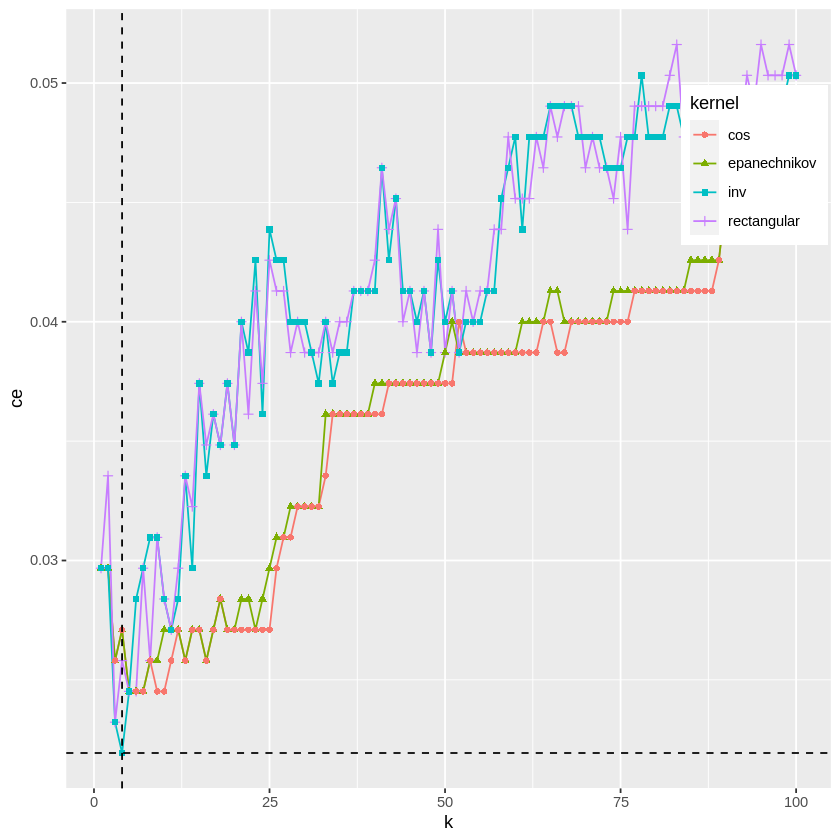

In [118]:
ce_kk <- train_kk$MISCLASS
min_ce <- min(ce_kk)
library(ggplot2)
as.data.frame(ce_kk) %>%
    mutate(k=1:nrow(ce_kk)) %>%
    gather(key="kernel",value="ce",-k) %>% # k不参与长宽变换
    ggplot(aes(x=k,y=ce,color=kernel))+
    geom_line()+
    geom_point(aes(shape=kernel))+
    geom_vline(aes(xintercept=best_k),linetype="dashed")+
    geom_hline(aes(yintercept=min_ce),linetype="dashed")+
    theme(legend.position=c(0.9,0.8))

